<img src="http://certificate.tpq.io/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# EPAT Session 1

**Executive Program in Algorithmic Trading**

**_Vectorized Backtesting_**

Prof. Dr. Yves J. Hilpisch | The Python Quants GmbH | http://tpq.io

<a href="https://home.tpq.io/certificates/pyalgo" target="_blank"><img src="https://hilpisch.com/pyalgo_cover_shadow.png" width="300px" align="left"></a>

## Basic Imports

In [1]:
import cufflinks
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('seaborn')
pd.set_option('mode.chained_assignment', None)
cufflinks.set_config_file(offline=True)
%config InlineBackend.figure_format = 'svg'

## Reading Financial Data

In [2]:
url = 'http://hilpisch.com/pyalgo_eikon_eod_data.csv'

In [3]:
raw = pd.read_csv(url, index_col=0, parse_dates=True).dropna()

In [4]:
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [5]:
raw.tail()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2019-12-24,284.27,157.38,59.41,1789.21,229.91,321.23,3223.38,12.67,1.1087,1498.8100,28.66,141.27
2019-12-26,289.91,158.67,59.82,1868.77,231.21,322.94,3239.91,12.65,1.1096,1511.2979,29.08,142.38
2019-12-27,289.80,158.96,60.08,1869.80,230.66,322.86,3240.02,13.43,1.1175,1510.4167,28.87,142.33
2019-12-30,291.52,157.59,59.62,1846.89,229.80,321.08,3221.29,14.82,1.1197,1515.1230,29.49,142.63
2019-12-31,293.65,157.70,59.85,1847.84,229.93,321.86,3230.78,13.78,1.1210,1517.0100,29.28,142.90


In [6]:
raw['RANDOM'] = 100
raw['RANDOM'].iloc[1:] += np.random.standard_normal(len(raw) - 1).cumsum()

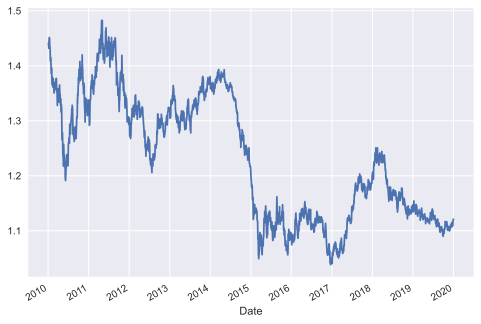

In [7]:
raw['EUR='].plot();

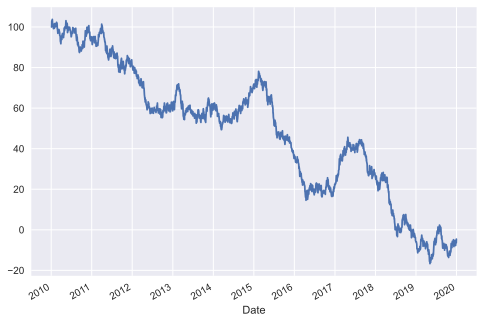

In [8]:
raw['RANDOM'].plot();

## Efficient Markets

In [9]:
symbol = 'RANDOM'
symbol = 'AAPL.O'
# symbol = '.SPX'
# symbol = 'EUR='

In [10]:
data = pd.DataFrame(raw[symbol])

In [11]:
cols = list()
lags = 5
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data[symbol].shift(lag)
    cols.append(col)

In [12]:
data.head(8)

,AAPL.O,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2010-01-04,30.572827,NaN,NaN,NaN,NaN,NaN
2010-01-05,30.625684,30.572827,NaN,NaN,NaN,NaN
2010-01-06,30.138541,30.625684,30.572827,NaN,NaN,NaN
2010-01-07,30.082827,30.138541,30.625684,30.572827,NaN,NaN
2010-01-08,30.282827,30.082827,30.138541,30.625684,30.572827,NaN
2010-01-11,30.015684,30.282827,30.082827,30.138541,30.625684,30.572827
2010-01-12,29.674256,30.015684,30.282827,30.082827,30.138541,30.625684
2010-01-13,30.092827,29.674256,30.015684,30.282827,30.082827,30.138541


In [13]:
data.dropna(inplace=True)

In [14]:
reg = np.linalg.lstsq(data[cols], data[symbol], rcond=-1)[0]  # OLS regression

In [15]:
reg

array([ 1.01115295, -0.05962216,  0.02453463,  0.05376726, -0.02880224])

In [16]:
reg.round()

array([ 1., -0.,  0.,  0., -0.])

In [17]:
data[cols].corr()  # dependent variables are highly positively correlated

,lag_1,lag_2,lag_3,lag_4,lag_5
lag_1,1.000000,0.999405,0.998797,0.998249,0.997733
lag_2,0.999405,1.000000,0.999403,0.998793,0.998245
lag_3,0.998797,0.999403,1.000000,0.999401,0.998791
lag_4,0.998249,0.998793,0.999401,1.000000,0.999401
lag_5,0.997733,0.998245,0.998791,0.999401,1.000000


## Simple Trading Strategy

In [18]:
symbol = 'EUR='

In [19]:
data = pd.DataFrame(raw[symbol])

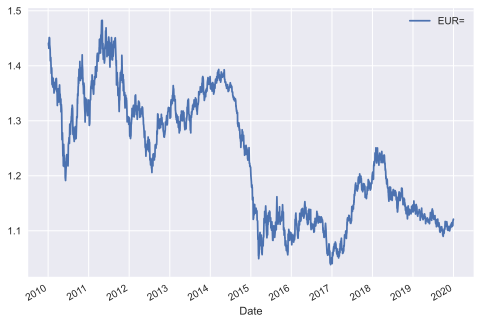

In [20]:
data.plot();

In [21]:
data['SMA1'] = data[symbol].rolling(42).mean()

In [22]:
data['SMA2'] = data[symbol].rolling(252).mean()

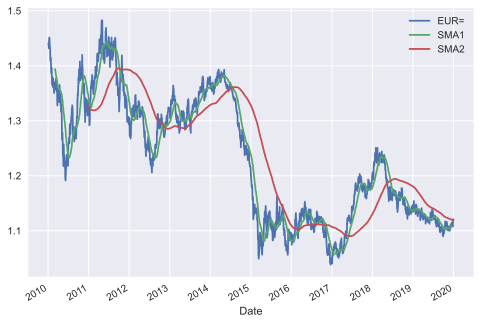

In [23]:
data.plot();

In [24]:
data.dropna(inplace=True)

In [25]:
# data['p'] = np.where(data['SMA1'] > data['SMA2'], 'long', 'short')

In [26]:
data['p'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

In [27]:
data.head()

,EUR=,SMA1,SMA2,p
Date,,,,
2010-12-31,1.3377,1.342579,1.326218,1
2011-01-03,1.3351,1.340945,1.325798,1
2011-01-04,1.3301,1.338940,1.325374,1
2011-01-05,1.3151,1.336448,1.324874,1
2011-01-06,1.3001,1.333995,1.324351,1


In [28]:
data.tail()

,EUR=,SMA1,SMA2,p
Date,,,,
2019-12-24,1.1087,1.107698,1.119630,-1
2019-12-26,1.1096,1.107740,1.119529,-1
2019-12-27,1.1175,1.107924,1.119428,-1
2019-12-30,1.1197,1.108131,1.119333,-1
2019-12-31,1.1210,1.108279,1.119231,-1


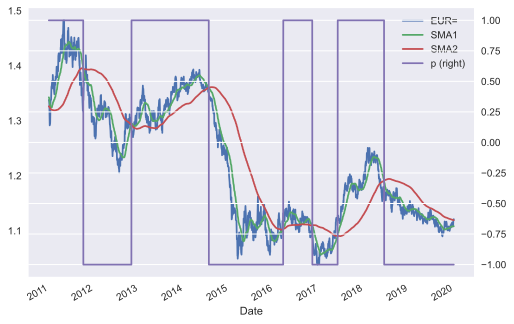

In [29]:
data.plot(secondary_y='p');

## Vectorized Backtesting

In [30]:
data['r'] = np.log(data[symbol] / data[symbol].shift(1))

In [31]:
data.head()

,EUR=,SMA1,SMA2,p,r
Date,,,,,
2010-12-31,1.3377,1.342579,1.326218,1,NaN
2011-01-03,1.3351,1.340945,1.325798,1,-0.001946
2011-01-04,1.3301,1.338940,1.325374,1,-0.003752
2011-01-05,1.3151,1.336448,1.324874,1,-0.011341
2011-01-06,1.3001,1.333995,1.324351,1,-0.011472


In [32]:
data['s'] = data['p'].shift(1) * data['r']

In [33]:
data.head()

,EUR=,SMA1,SMA2,p,r,s
Date,,,,,,
2010-12-31,1.3377,1.342579,1.326218,1,NaN,NaN
2011-01-03,1.3351,1.340945,1.325798,1,-0.001946,-0.001946
2011-01-04,1.3301,1.338940,1.325374,1,-0.003752,-0.003752
2011-01-05,1.3151,1.336448,1.324874,1,-0.011341,-0.011341
2011-01-06,1.3001,1.333995,1.324351,1,-0.011472,-0.011472


In [34]:
data[['r', 's']].sum()  # sum of log returns

r   -0.176731
s    0.253121
dtype: float64

In [35]:
np.exp(data[['r', 's']].sum())  # gross returns

r    0.838006
s    1.288039
dtype: float64

In [36]:
np.exp(data[['r', 's']].sum()) - 1  # net returns

r   -0.161994
s    0.288039
dtype: float64

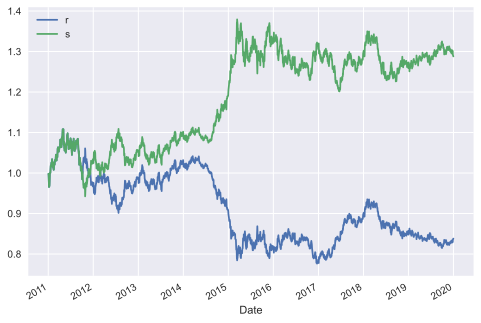

In [37]:
data[['r', 's']].cumsum().apply(np.exp).plot();  # gross returns over time

## Excursion: Discounting

In [38]:
S0 = 100

In [39]:
S1 = 105

In [40]:
S1 / S0

1.05

In [41]:
S1 / S0 - 1  # simple return

0.050000000000000044

In [42]:
lr = np.log(S1 / S0)  # log return

In [43]:
lr

0.04879016416943204

In [44]:
np.exp(lr)  # gross return

1.05

In [45]:
np.exp(lr) - 1  # net/simple return

0.050000000000000044

## Optimizing the Parameters (OOP Way)

### `FinancialData` Class

In [46]:
def f(x):
    return x ** 2

In [47]:
# f()

In [48]:
f(2)

4

In [49]:
import pandas as pd
import numpy as np

In [50]:
class FinancialData:
    url = 'http://hilpisch.com/pyalgo_eikon_eod_data.csv'
    def __init__(self, symbol):
        self.symbol = symbol
        self.retrieve_data()
        self.prepare_data()
    def retrieve_data(self):
        self.raw = pd.read_csv(self.url, index_col=0,
                               parse_dates=True).dropna()
    def prepare_data(self):
        self.data = pd.DataFrame(self.raw[self.symbol])
        self.data['r'] = np.log(self.data[self.symbol] /
                               self.data[self.symbol].shift(1))
    def plot_data(self, cols=None):
        if cols is None:
            cols = [self.symbol]
        self.data[cols].plot(title=self.symbol)

In [51]:
fd = FinancialData('XAU=')

In [52]:
fd

In [53]:
# fd.retrieve_data()

In [54]:
fd.raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [55]:
fd.data.head()

,XAU=,r
Date,,
2010-01-04,1120.00,NaN
2010-01-05,1118.65,-0.001206
2010-01-06,1138.50,0.017589
2010-01-07,1131.90,-0.005814
2010-01-08,1136.10,0.003704


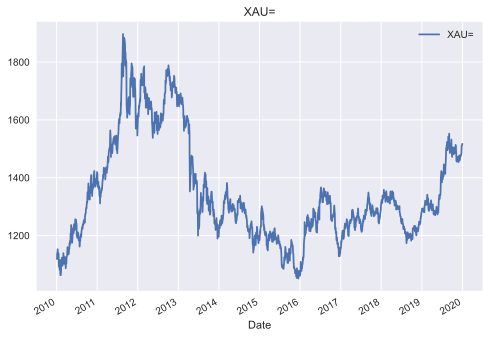

In [56]:
fd.plot_data()

### Vectorized Backtesting Class

In [57]:
class SMABacktester(FinancialData):
    def prepare_statistics(self):
        self.data['SMA1'] = self.data[self.symbol].rolling(self.SMA1).mean()
        self.data['SMA2'] = self.data[self.symbol].rolling(self.SMA2).mean()
    def backtest_strategy(self, SMA1, SMA2):
        self.SMA1 = SMA1
        self.SMA2 = SMA2
        self.prepare_statistics()
        self.data['p'] = np.where(self.data['SMA1'] > self.data['SMA2'], 1, -1)
        self.data['s'] = self.data['p'].shift(1) * self.data['r']
        perf = self.data[['r', 's']].iloc[self.SMA2:].sum().apply(np.exp)
        return perf

In [58]:
sma = SMABacktester('EUR=')

In [59]:
sma.url

'http://hilpisch.com/pyalgo_eikon_eod_data.csv'

In [60]:
sma.backtest_strategy(42, 252)

r    0.838006
s    1.288039
dtype: float64

In [61]:
sma.backtest_strategy(30, 180)

r    0.858083
s    1.018486
dtype: float64

In [62]:
sma.data.head()

,EUR=,r,SMA1,SMA2,p,s
Date,,,,,,
2010-01-04,1.4411,NaN,NaN,NaN,-1,NaN
2010-01-05,1.4368,-0.002988,NaN,NaN,-1,0.002988
2010-01-06,1.4412,0.003058,NaN,NaN,-1,-0.003058
2010-01-07,1.4318,-0.006544,NaN,NaN,-1,0.006544
2010-01-08,1.4412,0.006544,NaN,NaN,-1,-0.006544


In [63]:
# sma.data.iloc[252:260]

In [64]:
sma.data.tail()

,EUR=,r,SMA1,SMA2,p,s
Date,,,,,,
2019-12-24,1.1087,0.000090,1.107073,1.113588,-1,-0.000090
2019-12-26,1.1096,0.000811,1.107370,1.113490,-1,-0.000811
2019-12-27,1.1175,0.007094,1.107933,1.113448,-1,-0.007094
2019-12-30,1.1197,0.001967,1.108520,1.113391,-1,-0.001967
2019-12-31,1.1210,0.001160,1.109053,1.113337,-1,-0.001160


### Optimization

In [65]:
sma1 = [30, 40, 50]
sma2 = [150, 200, 250]

In [66]:
list(zip(sma1, sma2))

[(30, 150), (40, 200), (50, 250)]

In [67]:
for SMA1, SMA2 in zip(sma1, sma2):
    print(SMA1, SMA2)
    perf = sma.backtest_strategy(SMA1, SMA2)
    print(perf)

30 150
r    0.843999
s    1.328335
dtype: float64
40 200
r    0.803872
s    1.074574
dtype: float64
50 250
r    0.847765
s    1.460062
dtype: float64


In [68]:
from itertools import product

In [69]:
list(product(sma1, sma2))

[(30, 150),
 (30, 200),
 (30, 250),
 (40, 150),
 (40, 200),
 (40, 250),
 (50, 150),
 (50, 200),
 (50, 250)]

In [70]:
for SMA1, SMA2 in product(sma1, sma2):
    print(SMA1, SMA2)
    perf = sma.backtest_strategy(SMA1, SMA2)
    print(perf)

30 150
r    0.843999
s    1.328335
dtype: float64
30 200
r    0.803872
s    1.232904
dtype: float64
30 250
r    0.847765
s    1.264140
dtype: float64
40 150
r    0.843999
s    1.288907
dtype: float64
40 200
r    0.803872
s    1.074574
dtype: float64
40 250
r    0.847765
s    1.386743
dtype: float64
50 150
r    0.843999
s    1.379325
dtype: float64
50 200
r    0.803872
s    1.053492
dtype: float64
50 250
r    0.847765
s    1.460062
dtype: float64


In [71]:
res = pd.DataFrame()
for SMA1, SMA2 in product(sma1, sma2):
    perf = sma.backtest_strategy(SMA1, SMA2)
    res = res.append(pd.DataFrame(
        {'SMA1': SMA1, 'SMA2': SMA2, 'BENCH': perf['r'], 'STRAT': perf['s']},
        index=[0]
    ), ignore_index=True)

<ipython-input-71-cf8bfe3b74b2>:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-71-cf8bfe3b74b2>:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-71-cf8bfe3b74b2>:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-71-cf8bfe3b74b2>:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-71-cf8bfe3b74b2>:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-71-cf8bfe3b74b2>:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

In [72]:
res

,SMA1,SMA2,BENCH,STRAT
0,30,150,0.843999,1.328335
1,30,200,0.803872,1.232904
2,30,250,0.847765,1.264140
3,40,150,0.843999,1.288907
4,40,200,0.803872,1.074574
5,40,250,0.847765,1.386743
6,50,150,0.843999,1.379325
7,50,200,0.803872,1.053492
8,50,250,0.847765,1.460062


In [73]:
res.sort_values('STRAT', ascending=False)

,SMA1,SMA2,BENCH,STRAT
8,50,250,0.847765,1.460062
5,40,250,0.847765,1.386743
6,50,150,0.843999,1.379325
0,30,150,0.843999,1.328335
3,40,150,0.843999,1.288907
2,30,250,0.847765,1.264140
1,30,200,0.803872,1.232904
4,40,200,0.803872,1.074574
7,50,200,0.803872,1.053492


## Optimization within Class

Optimization in the sense of "brute force" optimization (= checking a large number of parameter combinations and picking the best one).

In [74]:
class SMABacktester(FinancialData):
    def prepare_statistics(self):
        self.data['SMA1'] = self.data[self.symbol].rolling(self.SMA1).mean()
        self.data['SMA2'] = self.data[self.symbol].rolling(self.SMA2).mean()
    def backtest_strategy(self, SMA1, SMA2, start=None):
        if start is None:
            start = SMA2
        self.SMA1 = SMA1
        self.SMA2 = SMA2
        self.prepare_statistics()
        self.data['p'] = np.where(self.data['SMA1'] > self.data['SMA2'], 1, -1)
        self.data['s'] = self.data['p'].shift(1) * self.data['r']
        perf = self.data[['r', 's']].iloc[start:].sum().apply(np.exp)
        return perf
    def optimize_parameters(self, sma1, sma2):
        start = max(sma2)
        self.res = pd.DataFrame()
        for SMA1, SMA2 in product(sma1, sma2):
            perf = self.backtest_strategy(SMA1, SMA2, start=start)
            self.res = self.res.append(pd.DataFrame(
                {'SMA1': SMA1, 'SMA2': SMA2, 'BENCH': perf['r'], 'STRAT': perf['s']},
                index=[0]
            ), ignore_index=True)

In [75]:
sma = SMABacktester('EUR=')

In [76]:
sma.optimize_parameters(sma1, sma2)

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [77]:
sma.res.sort_values('STRAT', ascending=False)

,SMA1,SMA2,BENCH,STRAT
8,50,250,0.847765,1.460062
6,50,150,0.847765,1.421595
0,30,150,0.847765,1.404684
5,40,250,0.847765,1.386743
3,40,150,0.847765,1.328406
1,30,200,0.847765,1.300223
2,30,250,0.847765,1.264140
4,40,200,0.847765,1.133247
7,50,200,0.847765,1.077333


In [78]:
sma1 = range(30, 61, 2)
sma2 = range(150, 251, 2)

In [79]:
%time sma.optimize_parameters(sma1, sma2)  # beware of the overfitting trap

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

Wall time: 42 s


<ipython-input-74-83bced4fb127>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [80]:
sma.res.sort_values('STRAT', ascending=False)

,SMA1,SMA2,BENCH,STRAT
504,48,240,0.847765,1.506153
503,48,238,0.847765,1.501173
553,50,236,0.847765,1.491792
554,50,238,0.847765,1.490274
552,50,234,0.847765,1.489374
...,...,...,...,...
741,58,204,0.847765,1.041309
530,50,190,0.847765,1.032951
478,48,188,0.847765,1.022559
687,56,198,0.847765,1.022197


<img src="http://certificate.tpq.io/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>